In [1]:
import re
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

In [2]:
%matplotlib inline
sns.set_style("dark")

## Util

In [3]:
def read_json(path):
    file = json.loads(open(path).read())
    
    return file

In [4]:
def extract_word(begin, end, txt):
    return txt[begin:end]

In [5]:
base_dir = "../../data/AGAC_sample-annotations/AGAC_sample/"

## EDA

Count of entities in the dataset.

In [6]:
obj_list = []

for f in os.listdir(base_dir):
    file = read_json(base_dir + f)
    obj = file['denotations'][0]['obj']
    obj_list.append(obj)

In [7]:
obj_df = pd.DataFrame(obj_list, columns=['obj'])

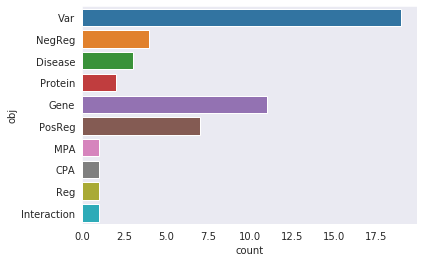

In [8]:
sns.countplot(y = "obj", data=obj_df)

Count of related words in the text.

In [9]:
word_list = []

for f in os.listdir(base_dir):
    file = read_json(base_dir + f)
    b = file['denotations'][0]['span']['begin']
    e = file['denotations'][0]['span']['end']
    txt = file['text']
    word = extract_word(b, e, txt)
    word_list.append(word)

In [10]:
word_df = pd.DataFrame(word_list, columns=['word'])

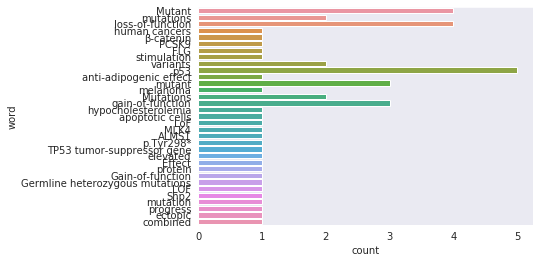

In [11]:
sns.countplot(y = "word", data=word_df)

## Prepare data [1 Sample File]

Prepare data in the correct format for training. 

In [12]:
file = read_json("../data/AGAC_sample-annotations/AGAC_sample/PubMed-28157721.json")

Label data in the BIO format. 

In [13]:
doc_id = "".join(re.findall(r'\d', 'PubMed-28157721.json'))
txt = file['text']
word_label_dict = {}


for i in range(len(file['denotations'])):
    b = file['denotations'][i]['span']['begin']
    e = file['denotations'][i]['span']['end']
    word = extract_word(b, e, txt)
    word_split = word.split(' ')
    obj = file['denotations'][i]['obj']
    
    if len(word_split) == 2:
        b_word = word_split[0]
        i_word = word_split[-1]
        b_obj = "B-" + obj
        i_obj = "I-" + obj
        word_label_dict[i_word] = i_obj
        word_label_dict[b_word] = b_obj
    

    else:
        b_word = word_split[0]
        b_obj = "B-" + obj
        
        word_label_dict[b_word] = b_obj

Create a list of tuples with doc_id, word, object.

In [14]:
txt = re.sub(r'\n', " ", txt)
txt = re.sub(r'\.', "", txt)
txt = re.sub(r',', "", txt)
txt = re.sub(r':', "", txt)


txt_split = txt.split(" ")
final_list = []

for w in txt_split:
    if w in word_label_dict.keys():
        final_list.append((doc_id, w, word_label_dict[w]))
    else:
        final_list.append((doc_id, w, "O"))

In [15]:
word_label_dict

{'variants': 'B-Var',
 'PCSK9': 'B-Gene',
 'gain-of-function': 'B-PosReg',
 'loss-of-function': 'B-NegReg',
 'effects': 'B-Reg',
 'cholesterol': 'I-MPA',
 'LDL': 'B-MPA',
 'disease': 'I-Disease',
 'cardiovascular': 'B-Disease',
 'GOF': 'B-PosReg',
 'affect': 'B-Reg',
 'domains': 'B-Protein',
 'reduce': 'B-NegReg',
 'receptor': 'I-Protein',
 'expression': 'B-MPA',
 'cause': 'B-Reg',
 'hypercholesterolemia': 'I-Disease',
 'familial': 'B-Disease',
 'LOF': 'B-NegReg',
 'increase': 'B-PosReg',
 'lowering': 'B-NegReg',
 'decreased': 'B-NegReg',
 'CVD': 'B-Disease'}

In [16]:
data_df = pd.DataFrame(final_list, columns=['doc_id', 'obj', 'word'])

In [17]:
data_df.head()

,doc_id,obj,word
0,28157721,Complexity,O
1,28157721,of,O
2,28157721,mechanisms,O
3,28157721,among,O
4,28157721,human,O


In [18]:
data_df[data_df['word'] != 'O'].head()

,doc_id,obj,word
10,28157721,variants,B-Var
20,28157721,variants,B-Var
31,28157721,gain-of-function,B-PosReg
34,28157721,loss-of-function,B-NegReg
38,28157721,effects,B-Reg


## Prepare Data [All Sample Files]

In [19]:
word_label_dict = {}

    
for f in os.listdir(base_dir):
    file = read_json(base_dir + f)
    doc_id = "".join(re.findall(r'\d', f))
    txt = file['text']


    for i in range(len(file['denotations'])):
        b = file['denotations'][i]['span']['begin']
        e = file['denotations'][i]['span']['end']
        word = extract_word(b, e, txt)
        word_split = word.split(' ')
        obj = file['denotations'][i]['obj']

        if len(word_split) == 2:
            b_word = word_split[0]
            i_word = word_split[-1]
            b_obj = "B-" + obj
            i_obj = "I-" + obj
            word_label_dict[i_word] = i_obj
            word_label_dict[b_word] = b_obj


        else:
            b_word = word_split[0]
            b_obj = "B-" + obj

            word_label_dict[b_word] = b_obj

In [20]:
final_list = []

for f in os.listdir(base_dir):
    file = read_json(base_dir + f)
    doc_id = "".join(re.findall(r'\d', f))
    txt = file['text']

    txt = re.sub(r'\n', " ", txt)
    txt = re.sub(r'\.', "", txt)
    txt = re.sub(r',', "", txt)
    txt = re.sub(r':', "", txt)


    txt_split = txt.split(" ")

    for w in txt_split:
        if w in word_label_dict.keys():
            final_list.append((doc_id, w, word_label_dict[w]))
        else:
            final_list.append((doc_id, w, "O"))

In [21]:
data_df = pd.DataFrame(final_list, columns=['doc_id', 'word', 'obj'])

In [22]:
data_df.head()

,doc_id,word,obj
0,24356649,Spliced,O
1,24356649,MDM2,O
2,24356649,isoforms,O
3,24356649,promote,I-PosReg
4,24356649,mutant,B-Var


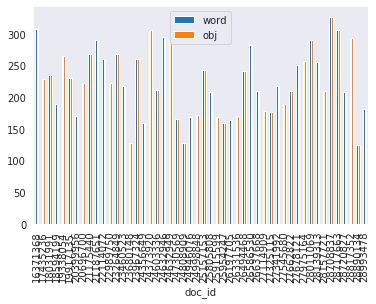

In [23]:
data_df.groupby('doc_id').count().plot(kind = "bar")